In [1]:
# Import Dependencies
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
encoding = 'unicode_escape'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Load raw data into a DataFrame
#raw_data = pd.read_excel('raw_data.xlsx')
# Read Raw Dataset
df = pd.read_excel('/content/drive/MyDrive/raw_data.xlsx')
# 1. Data Inspection and Understanding
# Check the first few rows of the dataset
#print(raw_data.head())
df.head()


,Disease,Count of Disease Occurrence,Symptom
0,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0008031_pain chest
1,NaN,NaN,UMLS:C0392680_shortness of breath
2,NaN,NaN,UMLS:C0012833_dizziness
3,NaN,NaN,UMLS:C0004093_asthenia
4,NaN,NaN,UMLS:C0085639_fall


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Count of Disease Occurrence'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Count of Disease Occurrence'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['Disease'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_3, *['Symptom'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_4, *['Disease', 'Symptom'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_5, *['Count of Disease Occurrence', 'Disease'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_6, *['Count of Disease Occurrence', 'Symptom'], **{'inner': 'stick'})
chart

In [8]:
# Check data types and missing values
#print(raw_data.info())
# Fill all NaN with the values above
data = df.fillna(method='ffill')

In [9]:
data.head()

,Disease,Count of Disease Occurrence,Symptom
0,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0008031_pain chest
1,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0392680_shortness of breath
2,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0012833_dizziness
3,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0004093_asthenia
4,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0085639_fall


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_7, *['Symptom'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['Count of Disease Occurrence', 'count()', 'Symptom'], **{})
chart

In [10]:
# Process Disease and Symptom Names
def process_data(data):
    data_list = []
    data_name = data.replace('^','_').split('_')
    n = 1
    for names in data_name:
        if (n % 2 == 0):
            data_list.append(names)
        n += 1
    return data_list

In [11]:
# Data Cleanup
disease_list = []
disease_symptom_dict = defaultdict(list)
disease_symptom_count = {}
count = 0

for idx, row in data.iterrows():

    # Get the Disease Names
    if (row['Disease'] !="\xc2\xa0") and (row['Disease'] != ""):
        disease = row['Disease']
        disease_list = process_data(data=disease)
        count = row['Count of Disease Occurrence']

    # Get the Symptoms Corresponding to Diseases
    if (row['Symptom'] !="\xc2\xa0") and (row['Symptom'] != ""):
        symptom = row['Symptom']
        symptom_list = process_data(data=symptom)
        for d in disease_list:
            for s in symptom_list:
                disease_symptom_dict[d].append(s)
            disease_symptom_count[d] = count

In [12]:
# See that the data is Processed Correctly
disease_symptom_dict

defaultdict(list,
            {'hypertensive disease': ['pain chest',
              'shortness of breath',
              'dizziness',
              'asthenia',
              'fall',
              'syncope',
              'vertigo',
              'sweat',
              'sweating increased',
              'palpitation',
              'nausea',
              'angina pectoris',
              'pressure chest'],
             'diabetes': ['polyuria',
              'polydypsia',
              'shortness of breath',
              'pain chest',
              'asthenia',
              'nausea',
              'orthopnea',
              'rale',
              'sweat',
              'sweating increased',
              'unresponsiveness',
              'mental status changes',
              'vertigo',
              'vomiting',
              'labored breathing'],
             'depression mental': ['feeling suicidal',
              'suicidal',
              'hallucinations auditory',
              'feel

In [13]:
# Count of Disease Occurence w.r.t each Disease
disease_symptom_count

{'hypertensive disease': 3363.0,
 'diabetes': 1421.0,
 'depression mental': 1337.0,
 'depressive disorder': 1337.0,
 'coronary arteriosclerosis': 1284.0,
 'coronary heart disease': 1284.0,
 'pneumonia': 1029.0,
 'failure heart congestive': 963.0,
 'accident\xa0cerebrovascular': 885.0,
 'asthma': 835.0,
 'myocardial infarction': 759.0,
 'hypercholesterolemia': 685.0,
 'infection': 630.0,
 'infection urinary tract': 597.0,
 'anemia': 544.0,
 'chronic obstructive airway disease': 524.0,
 'dementia': 504.0,
 'insufficiency renal': 445.0,
 'confusion': 408.0,
 'degenerative\xa0polyarthritis': 405.0,
 'hypothyroidism': 398.0,
 'anxiety state': 390.0,
 'malignant neoplasms': 354.0,
 'primary malignant neoplasm': 354.0,
 'acquired\xa0immuno-deficiency syndrome': 350.0,
 'HIV': 350.0,
 'hiv infections': 350.0,
 'cellulitis': 341.0,
 'gastroesophageal reflux disease': 325.0,
 'septicemia': 311.0,
 'systemic infection': 311.0,
 'sepsis (invertebrate)': 311.0,
 'deep vein thrombosis': 310.0,
 'deh

In [14]:
# Save cleaned data as CSV
#f = open('cleaned_data.csv', 'w')
#raw_data.to_csv('cleaned_data.csv', index=False)

In [15]:
f = open('/cleaned_data.csv', 'w')

with f:
    writer = csv.writer(f)
    for key, val in disease_symptom_dict.items():
        for i in range(len(val)):
            writer.writerow([key, val[i], disease_symptom_count[key]])

In [17]:
# Read Cleaned Data as DF
#df = pd.read_csv('cleaned_data.csv')
import pandas as pd

# Read cleaned data from a CSV file with 'latin1' encoding
df = pd.read_csv('/cleaned_data.csv', encoding='latin1')

# Rename columns
df.columns = ['disease', 'symptom', 'occurrence_count']

# Display the first few rows of the DataFrame
df.head()

,disease,symptom,occurrence_count
0,hypertensive disease,shortness of breath,3363.0
1,hypertensive disease,dizziness,3363.0
2,hypertensive disease,asthenia,3363.0
3,hypertensive disease,fall,3363.0
4,hypertensive disease,syncope,3363.0


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_9, *['symptom'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['occurrence_count', 'count()', 'symptom'], **{})
chart

In [18]:
# Remove any rows with empty values
df.replace(float('nan'), np.nan, inplace=True)
df.dropna(inplace=True)

In [19]:
from sklearn import preprocessing

In [20]:
n_unique = len(df['symptom'].unique())
n_unique

404

In [21]:
df.dtypes

disease              object
symptom              object
occurrence_count    float64
dtype: object

In [22]:
# Encode the Labels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['symptom'])
print(integer_encoded)

[328  87  28 ... 361 130 122]


In [23]:
# One Hot Encode the Labels
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
onehot_encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
len(onehot_encoded[0])

404

In [26]:
cols = np.asarray(df['symptom'].unique())
cols

array(['shortness of breath', 'dizziness', 'asthenia', 'fall', 'syncope',
       'vertigo', 'sweat', 'sweating increased', 'palpitation', 'nausea',
       'angina pectoris', 'pressure chest', 'polyuria', 'polydypsia',
       'pain chest', 'orthopnea', 'rale', 'unresponsiveness',
       'mental status changes', 'vomiting', 'labored breathing',
       'feeling suicidal', 'suicidal', 'hallucinations auditory',
       'feeling hopeless', 'weepiness', 'sleeplessness',
       'motor retardation', 'irritable mood', 'blackout',
       'mood depressed', 'hallucinations visual', 'worry', 'agitation',
       'tremor', 'intoxication', 'verbal auditory hallucinations',
       'energy increased', 'difficulty', 'nightmare',
       'unable to concentrate', 'homelessness', 'hypokinesia',
       'dyspnea on exertion', 'chest tightness', 'cough', 'fever',
       'decreased translucency', 'productive cough', 'pleuritic pain',
       'yellow sputum', 'breath sounds decreased', 'chill', 'rhonchus',
       '

In [27]:
# Create a new dataframe to save OHE labels
df_ohe = pd.DataFrame(columns = cols)
df_ohe.head()

,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,nausea,...,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts


In [28]:
for i in range(len(onehot_encoded)):
    df_ohe.loc[i] = onehot_encoded[i]

In [29]:
df_ohe.head()

,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,nausea,...,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
len(df_ohe)

2126

In [31]:
# Disease Dataframe
df_disease = df['disease']
df_disease.head()

0    hypertensive disease
1    hypertensive disease
2    hypertensive disease
3    hypertensive disease
4    hypertensive disease
Name: disease, dtype: object

In [32]:
# Concatenate OHE Labels with the Disease Column
df_concat = pd.concat([df_disease,df_ohe], axis=1)
df_concat.head()

,disease,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,...,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
0,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_concat.drop_duplicates(keep='first',inplace=True)

In [34]:
df_concat.head()

,disease,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,...,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
0,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,hypertensive disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
len(df_concat)

2097

In [36]:
cols = df_concat.columns
cols

Index(['disease', 'shortness of breath', 'dizziness', 'asthenia', 'fall',
       'syncope', 'vertigo', 'sweat', 'sweating increased', 'palpitation',
       ...
       'feces in rectum', 'prodrome', 'hypoproteinemia',
       'alcohol binge episode', 'abdomen acute', 'air fluid level',
       'catching breath', 'large-for-dates fetus', 'immobile',
       'homicidal thoughts'],
      dtype='object', length=405)

In [37]:
cols = cols[1:]

In [38]:
# Since, every disease has multiple symptoms, combine all symptoms per disease per row
df_concat = df_concat.groupby('disease').sum()
df_concat = df_concat.reset_index()
df_concat[:5]

,disease,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat,sweating increased,palpitation,...,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
0,Alzheimer's disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,HIV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PneumocystisÂ cariniiÂ pneumonia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,accidentÂ cerebrovascular,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,acquiredÂ immuno-deficiency syndrome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
len(df_concat)

149

In [40]:
df_concat.to_csv("training_dataset.csv", index=False)

In [41]:
# One Hot Encoded Features
X = df_concat[cols]

# Labels
y = df_concat['disease']

In [ ]:
#####################Model Training###########################

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load your dataset (replace 'your_dataset.csv' with your data file)
#data = pd.read_csv('your_dataset.csv')

# Assuming your dataset has a target column named 'chronic_disease' and features
#X = data.drop('chronic_disease', axis=1)
#y = data['chronic_disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

len(X_train), len(y_train)



(119, 119)

In [43]:
len(X_test), len(y_test)

(30, 30)

In [44]:
# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the model on the training data
naive_bayes_classifier.fit(X, y)

clf = DecisionTreeClassifier()
clf.fit(X, y)
#dt = DecisionTreeClassifier()
#clf_dt=dt.fit(X, y)
logistic_regression = LogisticRegression()
logistic_regression.fit(X, y)
random_forest = RandomForestClassifier()
random_forest.fit(X, y)
svm_classifier = SVC()
svm_classifier.fit(X, y)
#knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X, y)

KNeighborsClassifier()

In [45]:
naive_bayes_classifier.score(X, y)
clf.score(X, y)
logistic_regression.score(X, y)
random_forest.score(X, y)
svm_classifier.score(X, y)
knn_classifier.score(X, y)

0.1476510067114094

In [46]:
#y_pred = clf.predict(X_test)
#print(f'Accuracy of the model: {accuracy * 100:.2f}%')
#y_pred_knn = knn_classifier.predict(X_test)
#accuracy_knn = accuracy_score(y_test, y_pred_knn)
#print(f'Accuracy of K-Nearest Neighbors (KNN): {accuracy_knn * 100:.2f}%')
# Make predictions on the test data

naive_bayes_predictions = naive_bayes_classifier.predict(X_test)
y_pred = clf.predict(X_test)
y_pred_knn = knn_classifier.predict(X_test)
y_pred_lr = logistic_regression.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy for each classifier
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
accuracy = accuracy_score(y_test, y_pred)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f'Accuracy of Naive Bayes Model: {naive_bayes_accuracy*100:.2f}%')
print(f'Accuracy of the model: {accuracy * 100:.2f}%')
print(f'Accuracy of K-Nearest Neighbors (KNN): {accuracy_knn * 100:.2f}%')
print(f'Accuracy of Logistic Regression: {accuracy_lr * 100:.2f}%')
print(f'Accuracy of Random Forest: {accuracy_rf * 100:.2f}%')
print(f'Accuracy of Support Vector Machine (SVM): {accuracy_svm * 100:.2f}%')

Accuracy of Naive Bayes Model: 96.67%
Accuracy of the model: 96.67%
Accuracy of K-Nearest Neighbors (KNN): 10.00%
Accuracy of Logistic Regression: 100.00%
Accuracy of Random Forest: 96.67%
Accuracy of Support Vector Machine (SVM): 100.00%


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
model_names = ['naive_bayes_accuracy','DecisionTree', 'K-Nearest Neighbors', 'Logistic Regression', 'Random Forest', 'Support Vector Machine']  # Replace with your model names
accuracies = [naive_bayes_accuracy,accuracy,accuracy_knn,accuracy_lr,accuracy_rf,accuracy_svm]  # Replace with your accuracy values

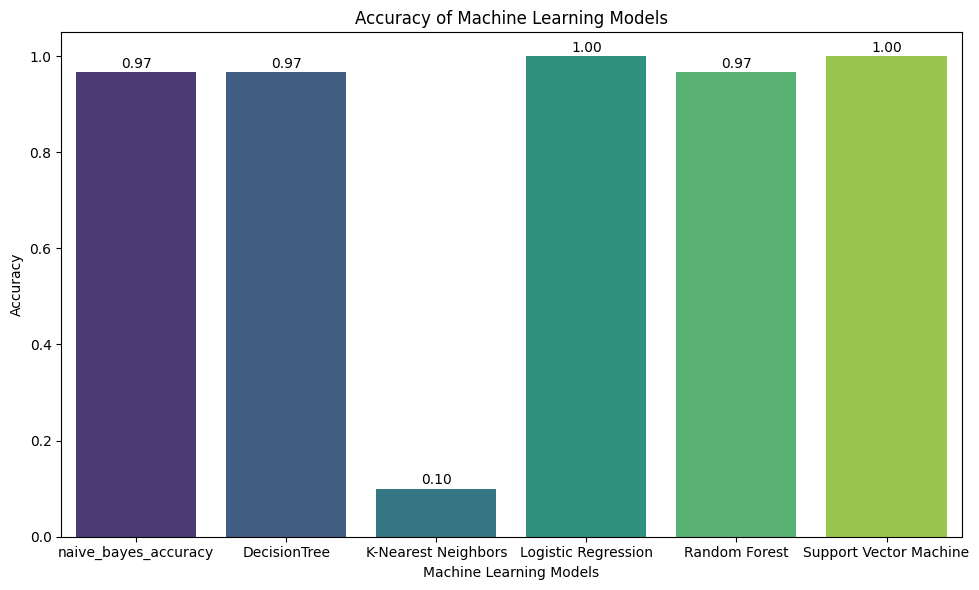

In [49]:
# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.barplot(x=model_names, y=accuracies, palette='viridis')  # You can change the palette

# Add labels and a title
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Machine Learning Models')

# Display the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center')

# Show the bar chart
plt.tight_layout()
plt.show()


In [50]:
from sklearn.metrics import classification_report

# Make predictions using your trained model (e.g., Naive Bayes)
naive_bayes_predictions = naive_bayes_classifier.predict(X_test)
y_pred = clf.predict(X_test)
y_pred_knn = knn_classifier.predict(X_test)
y_pred_lr = logistic_regression.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_svm = svm_classifier.predict(X_test)
# Generate the classification report
report = classification_report(y_test, naive_bayes_predictions)
report1 = classification_report(y_test, y_pred)
report2 = classification_report(y_test, y_pred_knn)
report3 = classification_report(y_test, y_pred_lr)
report4 = classification_report(y_test, y_pred_rf)
report5 = classification_report(y_test, y_pred_svm)
# Print the classification report
print(report)


                                 precision    recall  f1-score   support

                            HIV       1.00      1.00      1.00         1
               bipolar disorder       1.00      1.00      1.00         1
                     cellulitis       1.00      1.00      1.00         1
                      cirrhosis       1.00      1.00      1.00         1
                        colitis       1.00      1.00      1.00         1
                      confusion       1.00      1.00      1.00         1
                       delirium       1.00      1.00      1.00         1
                       delusion       1.00      1.00      1.00         1
                       dementia       1.00      1.00      1.00         1
                   endocarditis       1.00      1.00      1.00         1
gastroesophageal reflux disease       1.00      1.00      1.00         1
                       glaucoma       1.00      1.00      1.00         1
                    hemiparesis       1.00      1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [51]:
print(report1)


                                 precision    recall  f1-score   support

                            HIV       1.00      1.00      1.00         1
               bipolar disorder       1.00      1.00      1.00         1
                     cellulitis       1.00      1.00      1.00         1
                      cirrhosis       1.00      1.00      1.00         1
                        colitis       1.00      1.00      1.00         1
                      confusion       1.00      1.00      1.00         1
                       delirium       1.00      1.00      1.00         1
                       delusion       1.00      1.00      1.00         1
                       dementia       1.00      1.00      1.00         1
                   endocarditis       1.00      1.00      1.00         1
gastroesophageal reflux disease       1.00      1.00      1.00         1
                       glaucoma       1.00      1.00      1.00         1
                    hemiparesis       1.00      1.

In [52]:
print(report2)


                                      precision    recall  f1-score   support

                                 HIV       0.50      1.00      0.67         1
           accidentÂ cerebrovascular       0.00      0.00      0.00         0
acquiredÂ immuno-deficiency syndrome       0.00      0.00      0.00         0
                       affect labile       0.00      0.00      0.00         0
                       anxiety state       0.00      0.00      0.00         0
                           arthritis       0.00      0.00      0.00         0
        benign prostatic hypertrophy       0.00      0.00      0.00         0
                    biliary calculus       0.00      0.00      0.00         0
                    bipolar disorder       0.00      0.00      0.00         1
                      cardiomyopathy       0.00      0.00      0.00         0
                          cellulitis       0.00      0.00      0.00         1
                      cholelithiasis       0.00      0.00      

In [53]:
print(report3)


                                 precision    recall  f1-score   support

                            HIV       1.00      1.00      1.00         1
               bipolar disorder       1.00      1.00      1.00         1
                     cellulitis       1.00      1.00      1.00         1
                      cirrhosis       1.00      1.00      1.00         1
                        colitis       1.00      1.00      1.00         1
                      confusion       1.00      1.00      1.00         1
                       delirium       1.00      1.00      1.00         1
                       delusion       1.00      1.00      1.00         1
                       dementia       1.00      1.00      1.00         1
                   endocarditis       1.00      1.00      1.00         1
gastroesophageal reflux disease       1.00      1.00      1.00         1
                       glaucoma       1.00      1.00      1.00         1
                    hemiparesis       1.00      1.

In [54]:
print(report4)


                                 precision    recall  f1-score   support

                            HIV       1.00      1.00      1.00         1
               bipolar disorder       1.00      1.00      1.00         1
                     cellulitis       1.00      1.00      1.00         1
                      cirrhosis       1.00      1.00      1.00         1
                        colitis       1.00      1.00      1.00         1
                      confusion       1.00      1.00      1.00         1
                       delirium       1.00      1.00      1.00         1
                       delusion       1.00      1.00      1.00         1
                       dementia       1.00      1.00      1.00         1
                   endocarditis       1.00      1.00      1.00         1
gastroesophageal reflux disease       1.00      1.00      1.00         1
                       glaucoma       1.00      1.00      1.00         1
                    hemiparesis       1.00      1.

In [55]:
print(report5)

                                 precision    recall  f1-score   support

                            HIV       1.00      1.00      1.00         1
               bipolar disorder       1.00      1.00      1.00         1
                     cellulitis       1.00      1.00      1.00         1
                      cirrhosis       1.00      1.00      1.00         1
                        colitis       1.00      1.00      1.00         1
                      confusion       1.00      1.00      1.00         1
                       delirium       1.00      1.00      1.00         1
                       delusion       1.00      1.00      1.00         1
                       dementia       1.00      1.00      1.00         1
                   endocarditis       1.00      1.00      1.00         1
gastroesophageal reflux disease       1.00      1.00      1.00         1
                       glaucoma       1.00      1.00      1.00         1
                    hemiparesis       1.00      1.

In [56]:
disease_pred = clf.predict(X)

In [57]:
disease_real = y.values

In [58]:
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0}\nActual: {1}\n'.format(disease_pred[i], disease_real[i]))

Pred: coronary arteriosclerosis
Actual: coronary heart disease

Pred: depression mental
Actual: depressive disorder

Pred: malignant neoplasms
Actual: primary malignant neoplasm

Pred: septicemia
Actual: systemic infection



In [59]:
demo.ipynb


NameError: ignored

In [ ]:
##################   NOT GETING NEXT  #######################

In [ ]:
# Initialize and train the classifiers
# Create a Decision Tree classifier (you can use other classifiers as well)
#clf = DecisionTreeClassifier()

# Fit the model to the training data
#clf.fit(X_train, y_train)

# Make predictions on the test data
#y_pred = clf.predict(X_test)

# Calculate accuracy
#accuracy = accuracy_score(y_test, y_pred)
#print(f'Accuracy of the model: {accuracy * 100:.2f}%')

# 1. Logistic Regression
#logistic_regression = LogisticRegression()
#logistic_regression.fit(X_train, y_train)

# 2. Random Forest
#random_forest = RandomForestClassifier()
#random_forest.fit(X_train, y_train)

# 3. Support Vector Machine (SVM)
#svm_classifier = SVC()
#svm_classifier.fit(X_train, y_train)



# Initialize and train the KNN classifier (you can adjust the 'n_neighbors' parameter)
#knn_classifier = KNeighborsClassifier(n_neighbors=5)
#knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
#y_pred_knn = knn_classifier.predict(X_test)

# Calculate accuracy for KNN
#accuracy_knn = accuracy_score(y_test, y_pred_knn)
#print(f'Accuracy of K-Nearest Neighbors (KNN): {accuracy_knn * 100:.2f}%')


# Make predictions on the test data
#y_pred_lr = logistic_regression.predict(X_test)
#y_pred_rf = random_forest.predict(X_test)
#y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy for each classifier
#accuracy_lr = accuracy_score(y_test, y_pred_lr)
#accuracy_rf = accuracy_score(y_test, y_pred_rf)
#accuracy_svm = accuracy_score(y_test, y_pred_svm)

#print(f'Accuracy of Logistic Regression: {accuracy_lr * 100:.2f}%')
#print(f'Accuracy of Random Forest: {accuracy_rf * 100:.2f}%')
#print(f'Accuracy of Support Vector Machine (SVM): {accuracy_svm * 100:.2f}%')

In [ ]:
#export_graphviz(dt,
#                out_file='tree.dot',
#                feature_names=cols)

In [ ]:
pip install graphviz

In [ ]:
from graphviz import Source
from sklearn import tree

graph = Source(export_graphviz(dt,out_file=None,feature_names=cols))

png_bytes = graph.pipe(format='png')

with open('tree.png','wb') as f:f.write(png_bytes)

TypeError: ignored

In [ ]:
from IPython.display import Image
Image(png_bytes)

NameError: ignored

In [ ]:
# 3. Data Type Conversion (if necessary)
#raw_data['date_column'] = pd.to_datetime(raw_data['date_column'])
# 4. Handling Outliers (if necessary)
# Identify and handle outliers using statistical methods or domain knowledge

# 5. Data Scaling and Normalization (if necessary)
# Scale or normalize numerical features using StandardScaler or MinMaxScaler

# 6. Encoding Categorical Variables (if necessary)
# Encode categorical variables using one-hot encoding or label encoding

# 7. Feature Engineering (if necessary)
# Create new features or transform existing ones based on your analysis goals

# 8. Data Validation (if necessary)
# Validate data for correctness, consistency, and logical errors

# 9. Data Visualization (optional)
# Visualize data to gain insights and identify issues

# 10. Splitting Data (if doing machine learning)
# Split data into training, validation, and testing sets

# 11. Documentation
# Document the cleaning steps and decisions made during the process

# 12. Saving Cleaned Data
# Save the cleaned data to a new file
#raw_data.to_csv('cleaned_data.csv', index=False)


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



In [ ]:
# Load your dataset (replace 'your_dataset.csv' with your data file)
data = pd.read_csv('cleaned_data.csv')

# Assuming your dataset has a target column named 'chronic_disease' and features
#X = data.drop('chronic_disease', axis=1)
#y = data['chronic_disease']



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


NameError: name 'X' is not defined